In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [64]:
results = pd.DataFrame(columns=('model', 'train_r2', 'train_mse', 'cross_val_score'))
results

,model,train_r2,train_mse,cross_val_score


In [65]:
df = pd.read_csv('cleaned_features.csv')

In [66]:
x = df[['Movies', 'Thriller', 'Comedy',
       'Documentary', 'Fantasy/Fairy tales', 'Action', 'Music',
       'Classical music', 'Rock', 'Opera', 'Swing, Jazz', 'Art exhibitions',
       'Science and technology', 'Religion', 'Countryside, outdoors',
       'Fun with friends', 'Dancing', 'Law', 'Musical instruments',
       'Prioritising workload', 'Writing notes', 'Funniness', 'Fake',
       'Decision making', 'Empathy', 'Judgment calls', 'Loneliness',
       'Number of friends', 'Appearence and gestures', 'Personality',
       'Assertiveness', 'Healthy eating', 'Thinking ahead',
       'Finances', 'Spending on looks', 'Number of siblings',
       'Education']].astype(float)
y = df[['Workaholism']]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [68]:
#To evaluate our model. let's set a baseline to improve on by choosing at random and seing how that performs. 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

test = []
for i in range(len(y_train)):
  test.append(np.mean(y))

test = np.array(test)
val = np.array(y_train)
print("Our r squared score is " + str(r2_score(y_train,test)))
print( "our mean squared error is " + str(mean_squared_error(y_train, test)))
res = [('random', str((r2_score(y_train,test))), str(mean_squared_error(y_train, test)), np.nan)]
results = results.append(pd.DataFrame(res, columns=('model', 'train_r2', 'train_mse','cross_val_score' )))




Our r squared score is -1.6349398333836973e-05
our mean squared error is 1.6049201313937336


In [69]:
#Let's see if we can narrow the value of alpha more
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
reg = Ridge()
alphas=[100,200,300,400, 600]
parameters={'alpha':alphas}
ridge_gs = GridSearchCV(reg,parameters,cv=5)


ridge_gs.fit(X_train, y_train)
pred = ridge_gs.predict(X_train)
print( "our mean squared error is " + str(mean_squared_error(y_train, pred)))

      
      
res = [('Ridge', str((r2_score(y_train,pred))), str(mean_squared_error(y_train, pred)), str(ridge_gs.best_score_ ))]
results = results.append(pd.DataFrame(res, columns=('model', 'train_r2', 'train_mse','cross_val_score')))


print("The best cv score is " + str(ridge_gs.best_score_ ))

our mean squared error is 1.0374874460294765
The best cv score is 0.2916731942774298


In [70]:
#Now let's compare this to a tree

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
numTrees = [40]
max_depth = [2,3,4,5,6]
min_samples_leafs = [2,4,6,8]
min_samples_split = [2,3,4,5,6,7,8]


parameters={'n_estimators':numTrees, 'max_depth':max_depth, 'min_samples_leaf': min_samples_leafs, 'min_samples_split': min_samples_split}



forest_gs = GridSearchCV(reg,parameters,cv=5)


forest_gs.fit(X_train, np.ravel(y_train))
pred = forest_gs.predict(X_train)
print( "our mean squared error is " + str(mean_squared_error(y_train, pred)))


res = [('Forest', str((r2_score(y_train,pred))), str(mean_squared_error(y_train, pred)), str(forest_gs.best_score_ ))]
results = results.append(pd.DataFrame(res, columns=('model', 'train_r2', 'train_mse','cross_val_score')))



print("The best cv score is " + str(forest_gs.best_score_ ))




our mean squared error is 0.672468128287889
The best cv score is 0.2802058122982609


In [71]:
from sklearn.svm import SVR
svr = SVR()
y_c = np.ravel(y_train)
epsilon = np.logspace(-3, 3, 7)
gamma = np.logspace(-3, 3, 7)
c = np.logspace(-3, 3, 7)

parameters={'epsilon':epsilon, 'gamma': gamma, 'C': c}




svr_gs = GridSearchCV(svr,parameters,cv=5)

svr_gs.fit(X_train,y_c)
pred = svr_gs.predict(X_train)
print( "our mean squared error is " + str(mean_squared_error(y_train, pred)))
print ("The r2 score on the test data is " + str(r2_score(y_train, pred))) 


res = [('SVR', str((r2_score(y_train,pred))), str(mean_squared_error(y_train, pred)),str(svr_gs.best_score_ ))]
results = results.append(pd.DataFrame(res, columns=('model', 'train_r2', 'train_mse', 'cross_val_score')))
print("The best cv score is " + str(svr_gs.best_score_ ))


our mean squared error is 1.058680790434184
The r2 score on the test data is 0.3403421899202249
The best cv score is 0.28359566543868664


C:\Users\Gila\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
results

,model,train_r2,train_mse,cross_val_score
0,random,-1.6349398333836973e-05,1.6049201313937336,NaN
0,Ridge,0.3535476388946436,1.0374874460294765,0.2916731942774298
0,Forest,0.5809890413965986,0.672468128287889,0.2802058122982609
0,SVR,0.3403421899202249,1.058680790434184,0.28359566543868664


#Analysis and potential use

All of our models seem to be doing almost identically on the test data. All also are doing significantly better than the random model. The forest model has significant overfitting. Let's analyze the ridge numbers on the ridge model to see how we can use the model

Text(0.5, 1.0, 'deviation from true value- Test data')

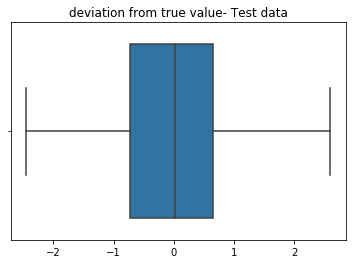

In [73]:
#Let's visualize the deviation from the true value. 

import seaborn as sns
pred = ridge_gs.predict(X_test)
residual = y_test - pred
sns.boxplot(residual)
plt.title("deviation from true value- Test data")


In [74]:
#number of samples less than 2
len(pred[pred<2])/len(pred)

0.046052631578947366

In [75]:
len(pred[pred>4])/len(pred)

0.039473684210526314

In [77]:
#Under 10 percent have values in the extreme, 5 or 1 

Text(0.5, 1.0, 'deviation from true value- Train data')

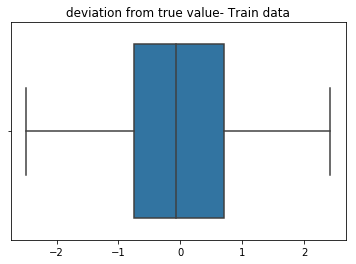

In [78]:
import seaborn as sns
pred = ridge_gs.predict(X_train)
residual = y_train - pred
sns.boxplot(residual)
plt.title("deviation from true value- Train data")

In [79]:
#50 percent of the values fall between -1 and 1 of the true value, agreeing with the fact that our mse is around 1 Since our scale is rated 1 to 5, 
#this model gives a strong indication of the approximate range, that a person may fit into. 


Text(336.9714285714286, 0.5, 'Predicted')

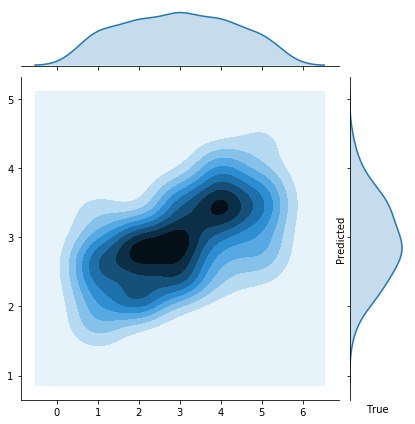

In [81]:
#Let's look at this from the lens of a joint plot
pred = ridge_gs.predict(X_test)
sns.jointplot(y_test, pred, kind = 'kde')
plt.xlabel("True")
plt.ylabel("Predicted")

In [82]:
#Note how most of the predicted values fall around a bit less than 3.
#Also note that our model doesn't seem to give many predictions above a 4 or below 1.5. 

#Now let's see how we might use this. 
#If our model predicts a value, let's say 4, we have a strong indication that they would be a workaholic. 
#Simmilarly if our model predics a value of 2, it is very possible that the true value they have is 1. 


In [89]:
pred = ridge_gs.predict(X_train)

Text(336.9714285714286, 0.5, 'Predicted')

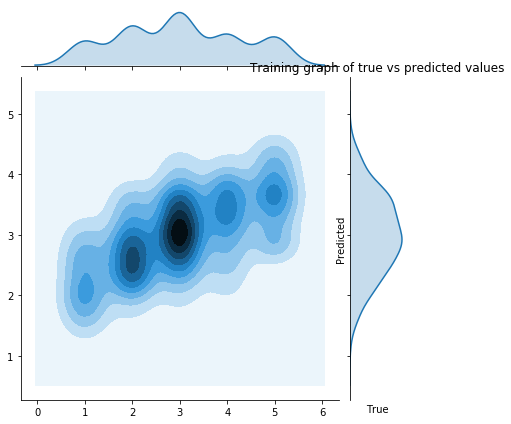

In [90]:
sns.jointplot(np.ravel(y_train), np.ravel(pred), kind = 'kde')
plt.title("Training graph of true vs predicted values")
plt.xlabel("True")
plt.ylabel("Predicted")

In [91]:
#The pred
pred = ridge_gs.predict(X_test)
mean_squared_error(y_test, pred)

1.1218326313955835

In [ ]:
#Our model does about .5 better than randomly guessing. The MSE though is too high to give an accurate prediction for what the true ranking
#out of 5 is. 